<a href="https://colab.research.google.com/github/finaorivia19/PCVK_Ganjil_2023/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nomor 3

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob
import cv2

In [11]:
#Input image
img = cv.imread('/content/drive/MyDrive/image/lena.jpg')
image = cv.cvtColor(img, cv.COLOR_BGR2RGB)

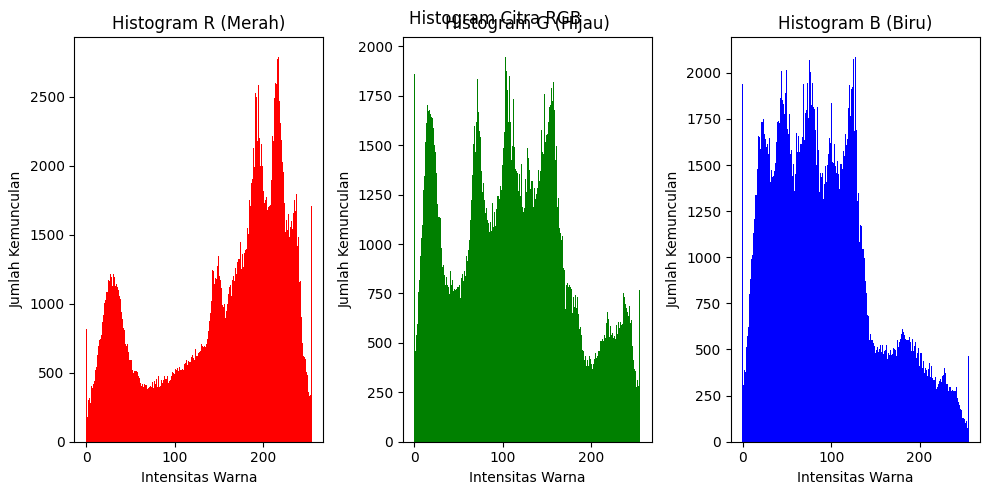

In [12]:
# Hitung jumlah kemunculan setiap pixel warna
pixel_counts = np.zeros((256, 3), dtype=int)

for row in image:
    for pixel in row:
        pixel_counts[pixel[0]][0] += 1  # R
        pixel_counts[pixel[1]][1] += 1  # G
        pixel_counts[pixel[2]][2] += 1  # B

# Membuat histogram RGB
intensitas_warna = np.arange(256)
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1) #Membuat subplot pertama, 3 subplot sejajar secara sejajar
plt.bar(intensitas_warna, pixel_counts[:, 0], width=1.0, color='red') #membuat histogram untuk saluran warna merah (R)
plt.title('Histogram R (Merah)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(1, 3, 2) #membuat subplot kedua dalam sebuah gambar dengan tiga subplot sejajar secara horizontal.
# angka 1, menunjukkan bahwa kita ingin membuat subplot dalam satu baris.
# angka 3, menunjukkan bahwa kita ingin membuat tiga subplot secara horizontal.
# angka 2, menunjukkan bahwa ini adalah subplot kedua dalam baris tersebut.
plt.bar(intensitas_warna, pixel_counts[:, 1], width=1.0, color='green')
plt.title('Histogram G (Hijau)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

plt.subplot(1, 3, 3)
plt.bar(intensitas_warna, pixel_counts[:, 2], width=1.0, color='blue')
plt.title('Histogram B (Biru)')
plt.xlabel('Intensitas Warna')
plt.ylabel('Jumlah Kemunculan')

# Menampilkan histogram RGB citra
plt.tight_layout()
plt.suptitle('Histogram Citra RGB')
plt.show()


Nomor 4

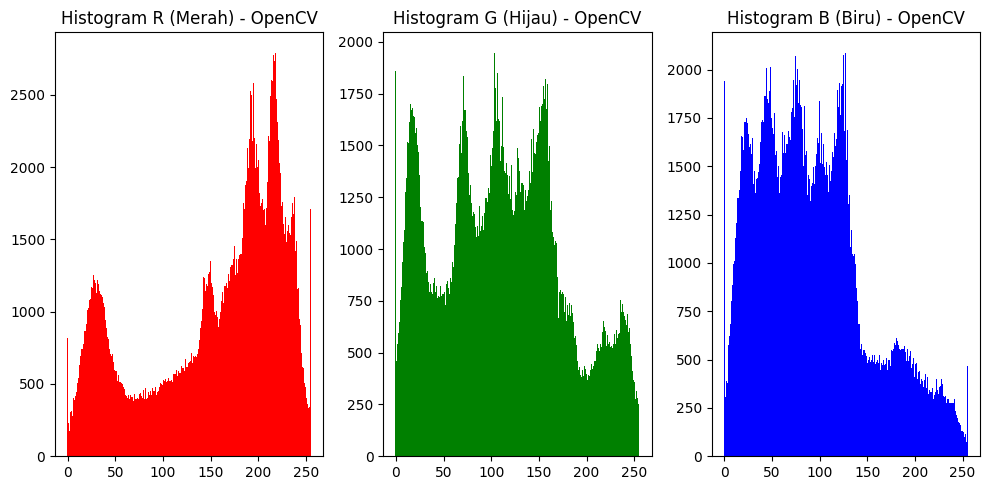

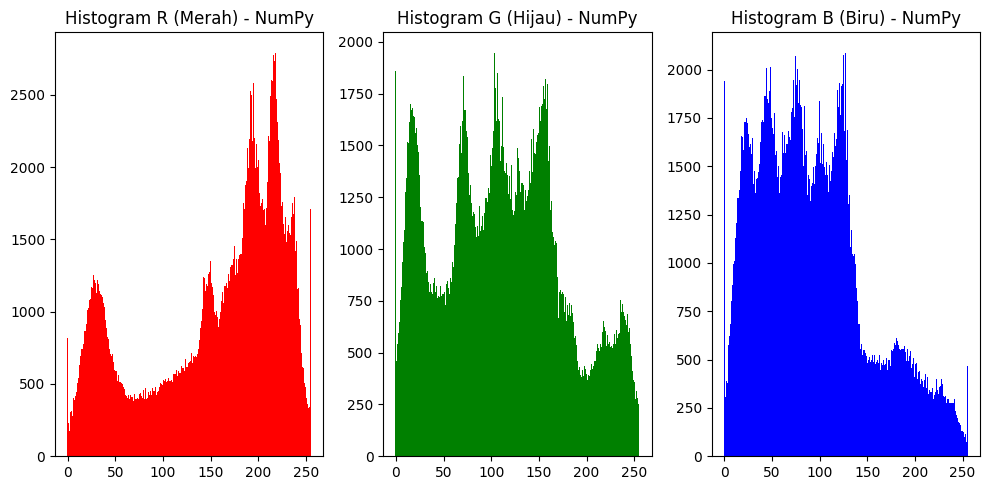

In [13]:
# Baca citra
image = cv2.imread('/content/drive/MyDrive/image/lena.jpg')

# Pisahkan saluran warna (R, G, B)
b, g, r = cv2.split(image)

# Hitung histogram menggunakan OpenCV
hist_r_cv2 = cv2.calcHist([r], [0], None, [256], [0, 256])
hist_g_cv2 = cv2.calcHist([g], [0], None, [256], [0, 256])
hist_b_cv2 = cv2.calcHist([b], [0], None, [256], [0, 256])

# Hitung histogram menggunakan NumPy
hist_r_numpy, _ = np.histogram(r, bins=256, range=(0, 256))
hist_g_numpy, _ = np.histogram(g, bins=256, range=(0, 256))
hist_b_numpy, _ = np.histogram(b, bins=256, range=(0, 256))

# Menampilkan histogram menggunakan Matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.bar(np.arange(256), hist_r_cv2.ravel(), width=1.0, color='red')
plt.title('Histogram R (Merah) - OpenCV')

plt.subplot(1, 3, 2)
plt.bar(np.arange(256), hist_g_cv2.ravel(), width=1.0, color='green')
plt.title('Histogram G (Hijau) - OpenCV')

plt.subplot(1, 3, 3)
plt.bar(np.arange(256), hist_b_cv2.ravel(), width=1.0, color='blue')
plt.title('Histogram B (Biru) - OpenCV')

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.bar(np.arange(256), hist_r_numpy, width=1.0, color='red')
plt.title('Histogram R (Merah) - NumPy')
plt.subplot(1, 3, 2)
plt.bar(np.arange(256), hist_g_numpy, width=1.0, color='green')
plt.title('Histogram G (Hijau) - NumPy')

plt.subplot(1, 3, 3)
plt.bar(np.arange(256), hist_b_numpy, width=1.0, color='blue')
plt.title('Histogram B (Biru) - NumPy')

plt.tight_layout()
plt.show()

Nomor 5

<ipython-input-17-23fbe4903207>:9: RuntimeWarning: invalid value encountered in divide
  cdf_normalized = cdf / cdf[-1]


TypeError: ignored

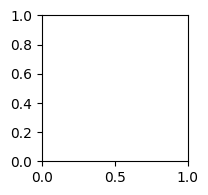

In [17]:
# Step 2: Input image
image = cv2.imread('/content/drive/MyDrive/image/lena.jpg.jpg', cv2.IMREAD_GRAYSCALE)  # Ubah menjadi citra grayscale

# Step 3: Menghitung jumlah kemunculan setiap pixel warna pada nilai tertentu (Frekuensi)
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Step 4: Penjumlahan kumulatif dari frekuensi dan normalisasi
cdf = histogram.cumsum()
cdf_normalized = cdf / cdf[-1]

# Step 5: Implementasi rumus K0 untuk transformasi
equalized_image = (cdf_normalized[image] * 255).astype(np.uint8)

# Step 6: Menampilkan citra sebelum histogram equalization
plt.subplot(2, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Citra Sebelum Histogram Equalization')
plt.axis('off')

# Step 7: Menampilkan histogram citra sebelum equalization
plt.subplot(2, 3, 2)
plt.hist(image.ravel(), bins=256, range=(0, 256), density=True, color='gray')
plt.title('Histogram Citra Sebelum Histogram Equalization')

# Step 8: Menampilkan citra setelah histogram equalization
plt.subplot(2, 3, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Citra Setelah Histogram Equalization')
plt.axis('off')

# Step 9: Menampilkan histogram citra setelah equalization
plt.subplot(2, 3, 4)
plt.hist(equalized_image.ravel(), bins=256, range=(0, 256), density=True, color='gray')
plt.title('Histogram Citra Setelah Histogram Equalization')

# Step 10: Menampilkan citra hasil histogram equalization
plt.subplot(2, 3, 5)
equalized_image_color = cv2.cvtColor(equalized_image, cv2.COLOR_GRAY2BGR)
plt.imshow(equalized_image_color)
plt.title('Citra Hasil Histogram Equalization')
plt.axis('off')

plt.tight_layout()
plt.show()